<a href="https://colab.research.google.com/github/jhtpo1230/AI/blob/main/pytochTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch
import matplotlib.pyplot as plt

mnist_train = datasets.MNIST(root='MNIST_data/',
                             train=True,
                             transform=transforms.ToTensor(),
                             download=True)
mnist_test = datasets.MNIST(root='MNIST_data/',
                             train=False,
                             transform=transforms.ToTensor(),
                             download=True)

BATSIZE = 10000

train_loader = DataLoader(dataset=mnist_train,
                          batch_size=BATSIZE,
                          shuffle=True,
                          num_workers=0)
test_loader = DataLoader(dataset=mnist_test,
                          batch_size=len(mnist_test),
                          shuffle=False,
                          num_workers=0)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

**데이터셋 및 변환 설정:**

datasets.MNIST를 사용하여 MNIST 데이터셋을 로드합니다.

root: 데이터셋이 저장될 경로입니다.

train=True: 훈련 데이터셋을 로드합니다. False로 설정하면 테스트 데이터셋을 로드합니다.

transform=transforms.ToTensor(): 이미지를 PyTorch 텐서로 변환합니다.

download=True: 데이터셋이 없으면 인터넷에서 다운로드합니다.

**데이터로더 설정:**

DataLoader를 사용하여 데이터를 미니배치로 나누고 섞어서 모델에 공급합니다.

batch_size: 각 미니배치의 크기입니다.

shuffle=True: 에폭마다 데이터를 섞어 훈련을 다양화시킵니다.

num_workers=0: 데이터 로딩을 병렬로 수행할 작업자(worker) 수입니다.

**GPU 사용 여부 확인:**

torch.cuda.is_available()를 사용하여 GPU가 사용 가능한지 확인하고, 그에 따라 device를 설정합니다.

In [9]:
class Net(torch.nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = torch.nn.Linear(784, 1024)
    self.fc2 = torch.nn.Linear(1024, 512)
    self.fc3 = torch.nn.Linear(512, 256)
    self.fc4 = torch.nn.Linear(256, 128)
    self.fc5 = torch.nn.Linear(128, 10)
    self.relu = torch.nn.ReLU()

  def forward(self, x):
      x = x.view(-1, 784)
      x = self.relu(self.fc1(x))
      x = self.relu(self.fc2(x))
      x = self.relu(self.fc3(x))
      x = self.relu(self.fc4(x))
      z = self.fc5(x)
      return z

net = Net().to(device)
cel = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr = 0.01)

EPOCHS = 10
for epoch in range(EPOCHS):
  l_sum = 0

  for batch_idx, (x,y) in enumerate(train_loader):
    x, y = x.to(device), y.to(device)
    z = net(x)
    loss = cel(z, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    l_sum += loss.item()

  print(f'Epoch : {epoch+1:3d} / {EPOCHS}',
        f'Loss: {l_sum:0.6f}')

Epoch :   1 / 10 Loss: 14.010098
Epoch :   2 / 10 Loss: 8.188321
Epoch :   3 / 10 Loss: 4.299323
Epoch :   4 / 10 Loss: 2.590834
Epoch :   5 / 10 Loss: 1.799208
Epoch :   6 / 10 Loss: 1.328401
Epoch :   7 / 10 Loss: 1.033114
Epoch :   8 / 10 Loss: 0.817957
Epoch :   9 / 10 Loss: 0.668356
Epoch :  10 / 10 Loss: 0.546014


**신경망 정의:**

Net 클래스는 PyTorch의 torch.nn.Module을 상속합니다.

__init__ 메서드에서는 다섯 개의 선형 레이어(torch.nn.Linear)와 활성화 함수로 ReLU(torch.nn.ReLU())를 정의합니다.

**self.fc1(x)** - 첫 번째 선형 레이어: 입력 x가 첫 번째 선형 레이어 self.fc1을 통과하면 가중치와 편향에 대한 연산이 이루어집니다.

이 연산은 입력과 가중치 행렬을 행렬 곱셈하고 편향을 더하는 선형 연산을 수행합니다.

**self.relu(...) - ReLU 활성화 함수**: 선형 연산의 결과는 ReLU 활성화 함수에 전달됩니다. ReLU는 입력이 양수일 경우 그 값을 그대로 반환하고, 음수일 경우 0으로 변환하는 함수입니다.


**Forward 메서드:**

forward 메서드에서는 데이터의 흐름을 정의합니다. 입력 데이터는 x.view(-1, 784)를 통해 평평한 형태로 변환되고, 각 레이어를 통과하며 연산이 수행됩니다.

**모델 인스턴스 생성 및 손실 함수, 옵티마이저 정의:**

Net()을 호출하여 모델 인스턴스를 생성하고, GPU 또는 CPU에 모델을 올립니다.

손실 함수로는 크로스 엔트로피 손실(torch.nn.CrossEntropyLoss())을 사용하고, 옵티마이저는 Adam 옵티마이저(torch.optim.Adam)를 사용합니다.

**훈련 루프:**

주어진 에폭(EPOCHS) 동안 훈련을 반복합니다.

각 미니배치에 대해 순전파, 손실 계산, 역전파, 그리고 옵티마이저 업데이트가 수행됩니다.


**순전파 (Forward Pass):**

x, y = x.to(device), y.to(device): 입력 데이터 x와 정답 레이블 y를 GPU 또는 CPU로 옮깁니다.

z = net(x): 입력 데이터를 모델에 전달하여 예측값 z를 얻습니다. 이 부분이 순전파의 일부입니다.

**손실 계산:**

loss = cel(z, y): 손실 함수를 사용하여 모델의 예측값 z와 실제 정답 레이블 y 간의 손실을 계산합니다. 이 부분이 손실 계산의 일부입니다.

**역전파 (Backward Pass):**

optimizer.zero_grad(): 옵티마이저의 그레이디언트를 초기화합니다. 이 부분은 새로운 미니배치에 대한 역전파를 시작하기 전에 필요합니다.

loss.backward(): 손실에 대한 역전파를 수행하여 모델 파라미터에 대한 그레이디언트를 계산합니다. 이 부분이 역전파의 일부입니다.

**최적화 (Optimizer Step):**

optimizer.step(): 옵티마이저를 사용하여 모델의 파라미터를 업데이트합니다. 이 부분이 최적화의 일부입니다.

Predicted: 8
Label: 8


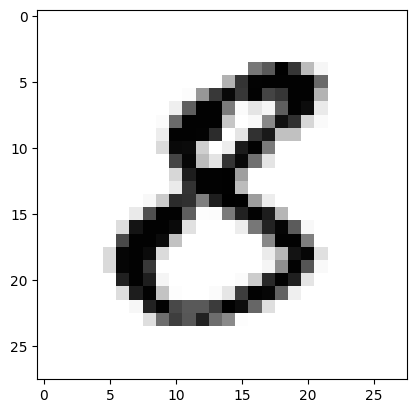

In [10]:
index = 1234 #0~9999까지의 랜덤 그림

net.eval()
x = mnist_test[index][0].view(28, 28).to(device)
y = mnist_test[index][1]

z = net(x)
pred = torch.max(z, 1)[1].item()

print(f'Predicted: {pred}')
print(f'Label: {y}')

plt.imshow(x.cpu(), cmap='Greys')
plt.show()